# Hyperparameter Tuning(Regression Model)

# Lasso(L1), Ridge(L2) and Elasticnet

Lasso regression helps in reducing over-fitting and helps in feature selection

This regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output.

In [32]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import KFold
%matplotlib inline

# ignore warnings from pandas
import warnings
warnings.filterwarnings('ignore')

#Making different dataframes from csv
df = pd.read_csv(os.getcwd()+'/FT_data_final.csv')

In [54]:
#passing features which are required to predict model
X = df[['mean_loan_amt','mean_funded_amnt','mean_term','mean_annual_inc',
       'mean_dti','mean_delinq_2yrs','mean_mths_since_last_delinq','mean_open_cc','mean_pub_rec',
       'mean_revol_bal','mean_total_paymnt','mean_rec_int','mean_total_rec_late_fee','mean_recoveries',
       'mean_dti_joint','mean_annual_inc_joint','mean_total_cur_bal']]
Y = df['int_rate']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=101)

X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

(50838,)

In [35]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
#L1 Regression
from sklearn.linear_model import Lasso
lm_lasso = Lasso(alpha=0.1)
lm_lasso
lm_lasso.fit(X_train,Y_train)

#Calculating score
train_score=lm_lasso.score(X_train,Y_train)
test_score=lm_lasso.score(X_test,Y_test)
coeff_used = np.sum(lm_lasso.coef_!=0)

print ("training score for alpha", train_score)
print ("test score for alpha", test_score)
print ("number of features used:", coeff_used)

training score for alpha 0.9096849465478046
test score for alpha 0.9087783459381463
number of features used: 8


In [37]:
#L2 Regression
from sklearn.linear_model import Ridge
lm_ridge = Ridge(alpha=100)
lm_ridge
lm_ridge.fit(X_train,Y_train)

#Calculating score
train_score=lm_ridge.score(X_train,Y_train)
test_score=lm_ridge.score(X_test,Y_test)

print ("training score", train_score)
print ("test score", test_score)

training score 0.9098115703205049
test score 0.9087760441860309


In [38]:
#Elasticnet Regression
from sklearn.linear_model import ElasticNet
lm_elastic = ElasticNet(alpha=1.0)
lm_elastic
lm_elastic.fit(X_train,Y_train)

#Calculating score
train_score=lm_elastic.score(X_train,Y_train)
test_score=lm_elastic.score(X_test,Y_test)

print ("training score", train_score)
print ("test score", test_score)

training score 0.9095327966627228
test score 0.9086773043245187


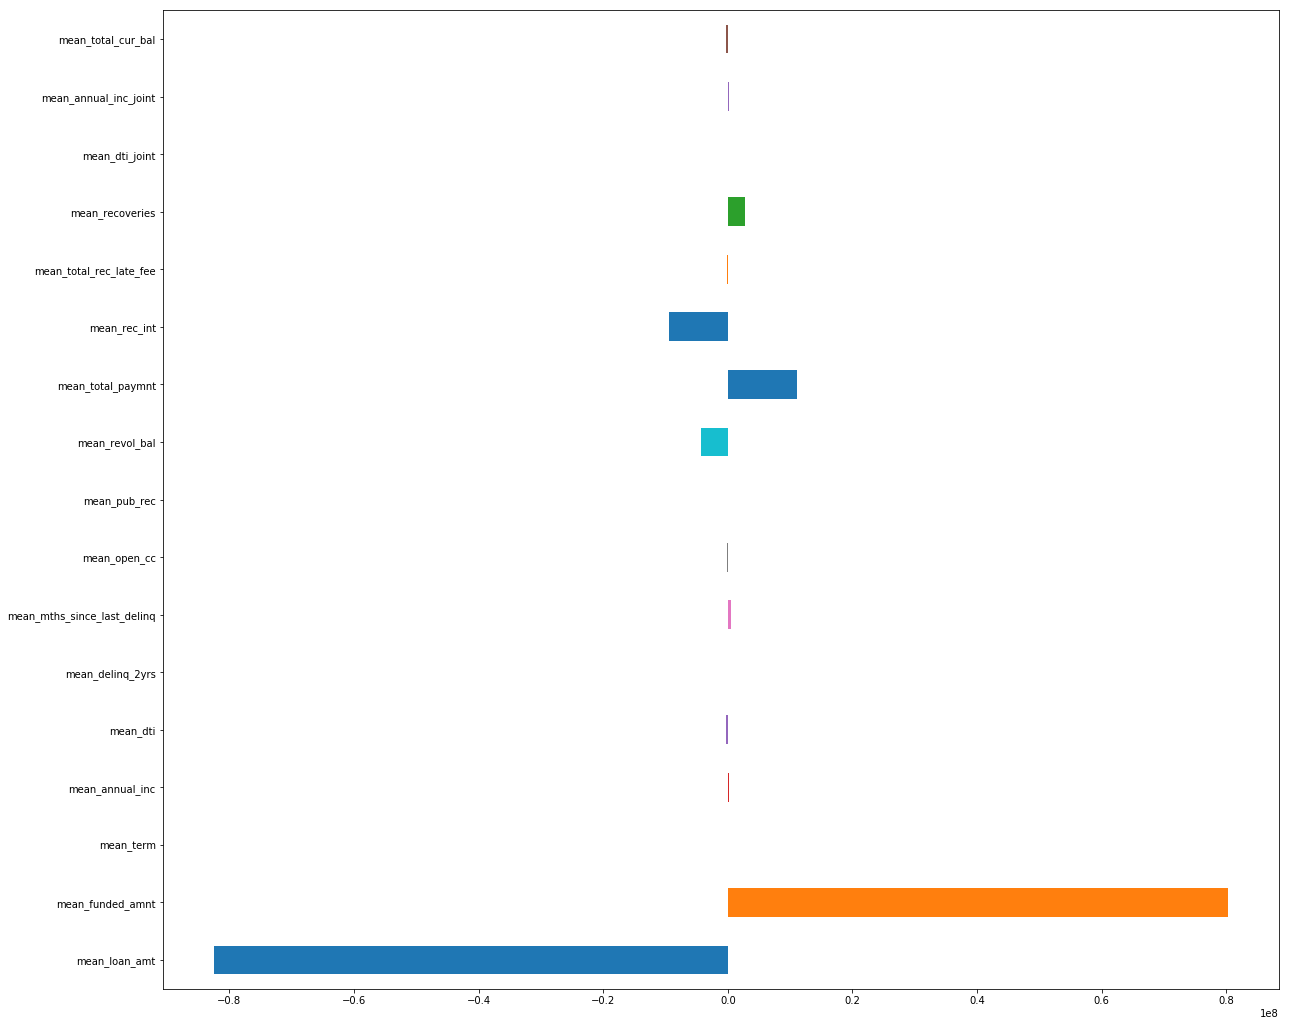

In [39]:
plt.figure(figsize=(20,18))
ft_importance_lm = pd.Series(lm.coef_,index = X.columns)
ft_importance_lm.plot(kind='barh')
plt.show()

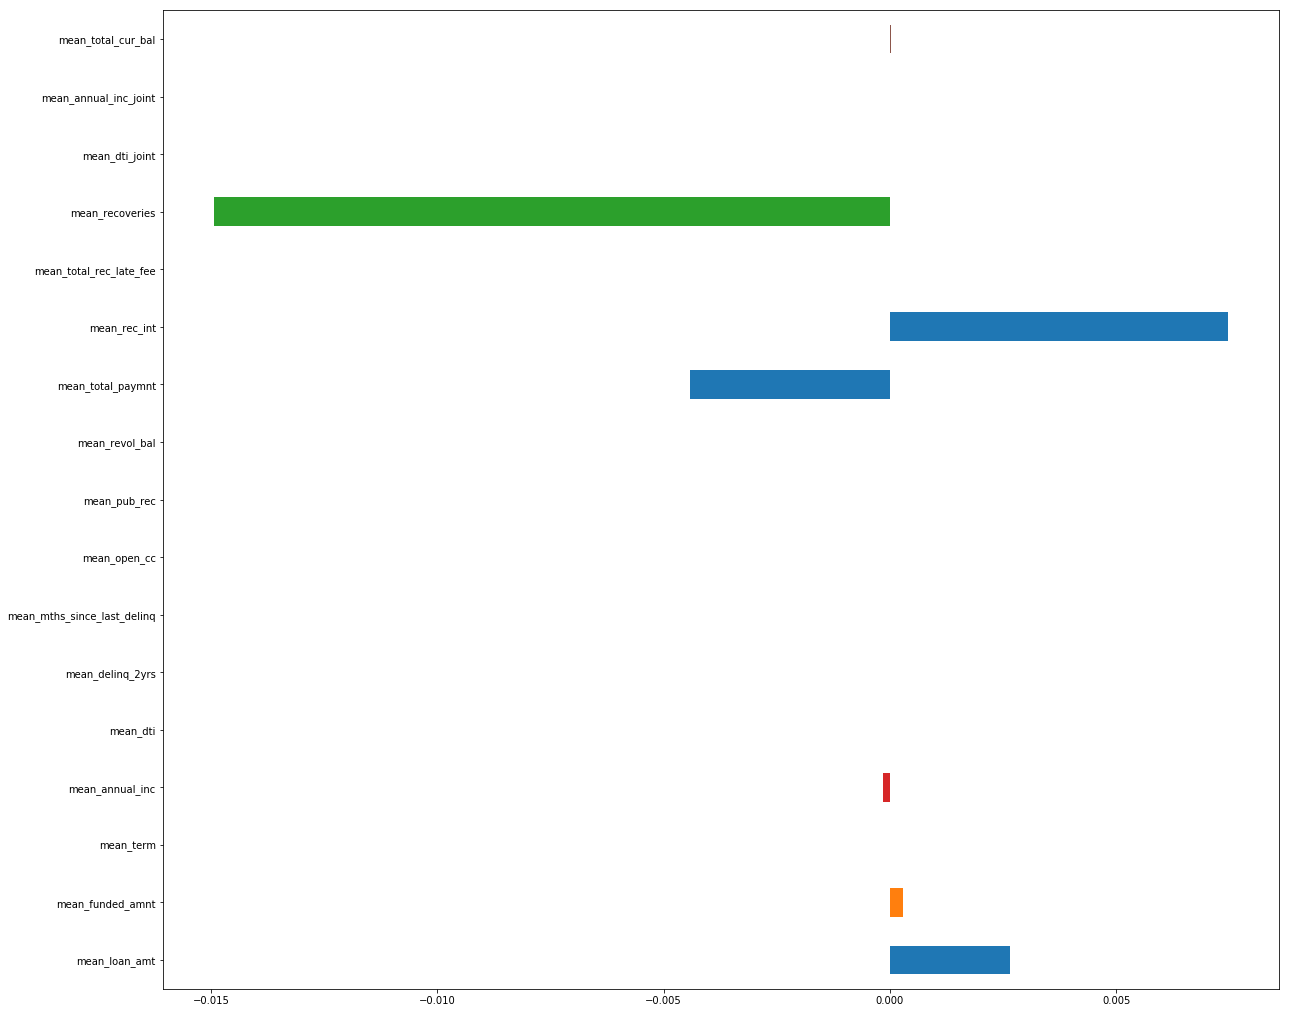

In [40]:
plt.figure(figsize=(20,18))
ft_importance_lm = pd.Series(lm_lasso.coef_,index = X.columns)
ft_importance_lm.plot(kind='barh')
plt.show()

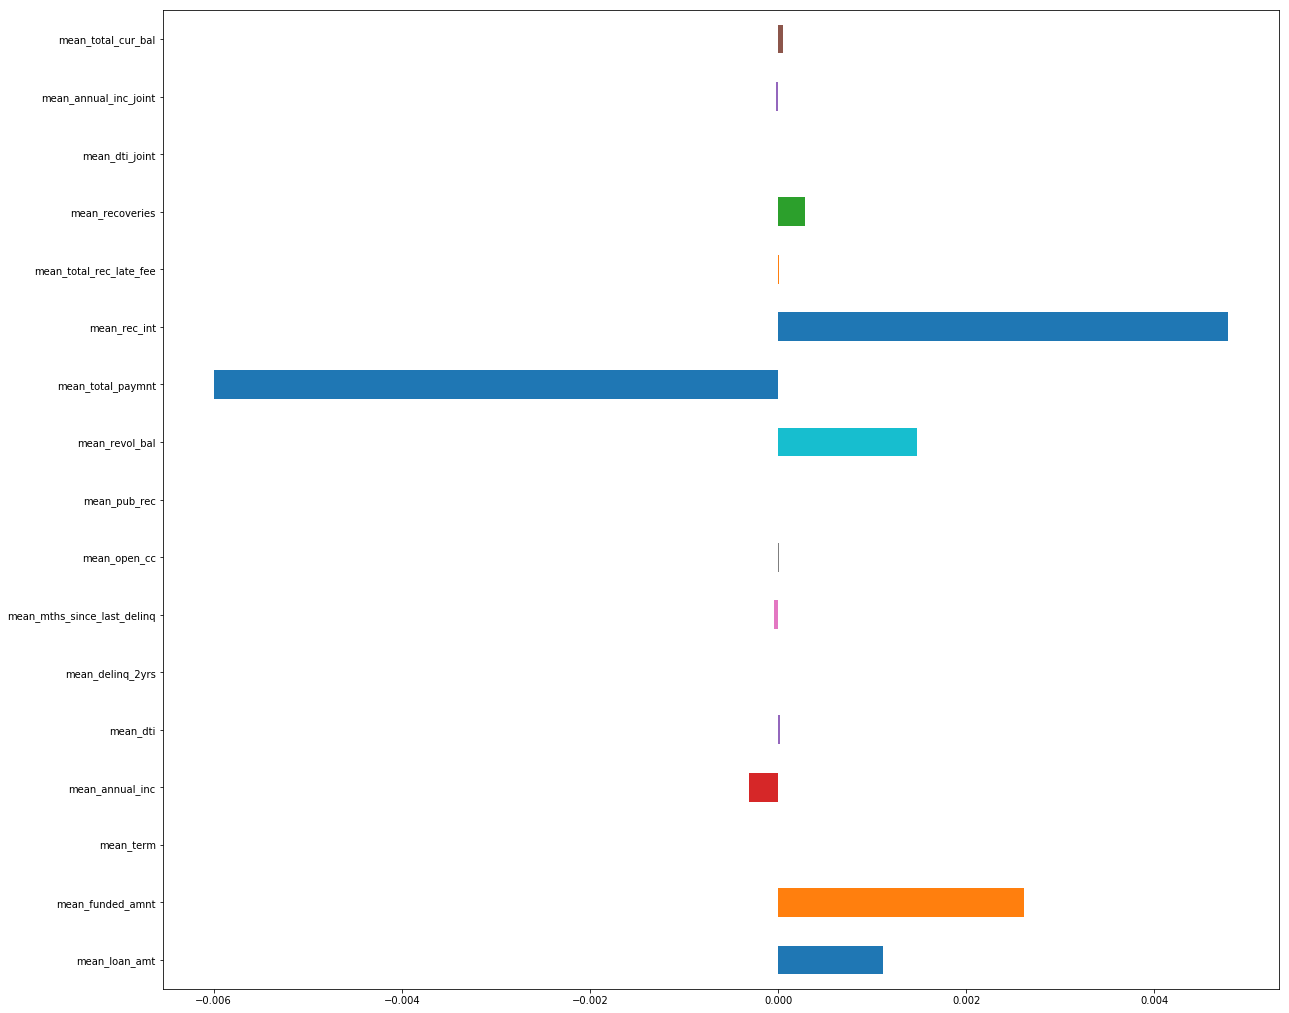

In [41]:
plt.figure(figsize=(20,18))
ft_importance_lm = pd.Series(lm_ridge.coef_,index = X.columns)
ft_importance_lm.plot(kind='barh')
plt.show()

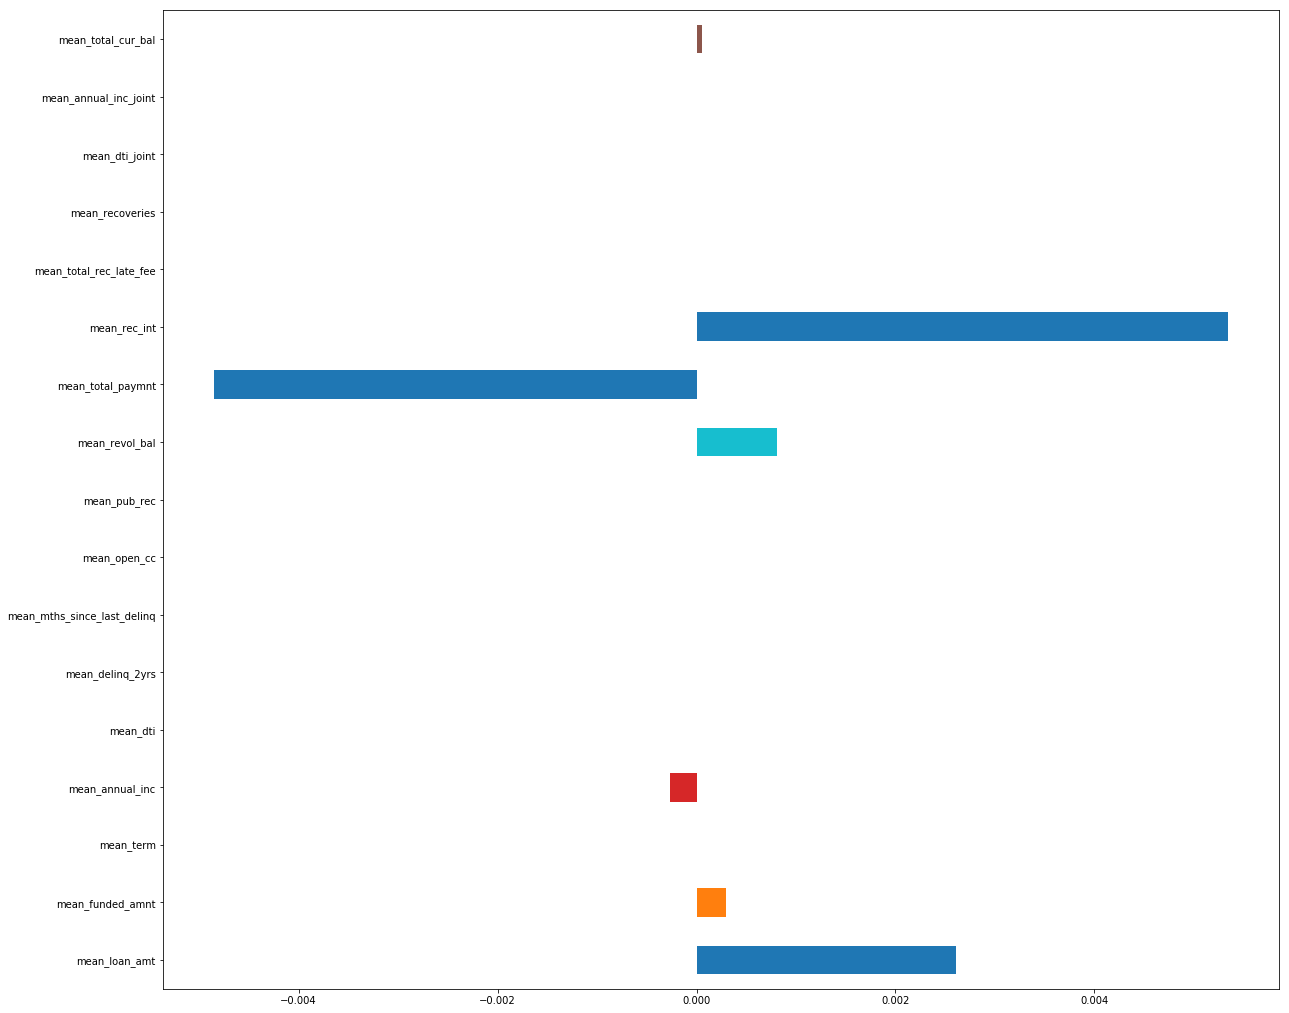

In [42]:
plt.figure(figsize=(20,18))
ft_importance_lm = pd.Series(lm_elastic.coef_,index = X.columns)
ft_importance_lm.plot(kind='barh')
plt.show()

In [49]:
#Calculation and priting RMSE
print('Simple Regression-Root Mean Squared Error:', lm.score(X_train,Y_train)*100)
print('LASSO Regression-Root Mean Squared Error:', lm_lasso.score(X_train,Y_train)*100)
print('Ridge Regression-Root Mean Squared Error:', lm_ridge.score(X_train,Y_train)*100)
print('Elastic Regression-Root Mean Squared Error:', lm_elastic.score(X_train,Y_train)*100)

Simple Regression-Root Mean Squared Error: 90.98096769146508
LASSO Regression-Root Mean Squared Error: 90.96849465478046
Ridge Regression-Root Mean Squared Error: 90.98115703205049
Elastic Regression-Root Mean Squared Error: 90.95327966627228


In [44]:
#predicting test data
predict_test_lm = lm.predict(X_test)
predict_test_lasso = lm_lasso.predict(X_test)
predict_test_ridge = lm_ridge.predict(X_test)
predict_test_elastic = lm_elastic.predict(X_test)

In [51]:
import numpy as np
from sklearn import metrics

#function for calculating MAPE

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculation and priting MSE, MAPE and MAE

print('Simple Regression-Mean Squared Error:', metrics.mean_squared_error(Y_test,predict_test_lm))
print('LASSO Regression-Mean Squared Error:', metrics.mean_squared_error(Y_test,predict_test_lasso))
print('Ridge Regression-Mean Squared Error:', metrics.mean_squared_error(Y_test,predict_test_ridge))
print('Elastic Regression-Mean Squared Error:', metrics.mean_squared_error(Y_test,predict_test_elastic))

print('Simple Regression-Mean Absolute Percentage Error:', mean_absolute_percentage_error(Y_test,predict_test_lm))
print('LASSO Regression-Mean Absolute Percentage Error:', mean_absolute_percentage_error(Y_test,predict_test_lasso))
print('Ridge Regression-Mean Absolute Percentage Error:', mean_absolute_percentage_error(Y_test,predict_test_ridge))
print('Elastic Regression-Mean Absolute Percentage Error:', mean_absolute_percentage_error(Y_test,predict_test_elastic))

print('Simple Regression-Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predict_test_lm))
print('LASSO Regression-Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predict_test_lasso))
print('Ridge Regression-Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predict_test_ridge))
print('Elastic Regression-Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predict_test_elastic))

Simple Regression-Mean Squared Error: 1.7673856313778664
LASSO Regression-Mean Squared Error: 1.767377021712332
Ridge Regression-Mean Squared Error: 1.7674216170865387
Elastic Regression-Mean Squared Error: 1.7693346558727612
Simple Regression-Mean Absolute Percentage Error: 8.443315075858036
LASSO Regression-Mean Absolute Percentage Error: 8.451402539762718
Ridge Regression-Mean Absolute Percentage Error: 8.442277175603637
Elastic Regression-Mean Absolute Percentage Error: 8.459643245860294
Simple Regression-Mean Absolute Error: 1.0646057876958492
LASSO Regression-Mean Absolute Error: 1.0651620514930171
Ridge Regression-Mean Absolute Error: 1.064397246552341
Elastic Regression-Mean Absolute Error: 1.066328278442036
